



<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz" style="width:400px;height:70px;"/>




# Data Science with Python - Project One
## ( Movielens Case Study )

This analysis is to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

## Importing Necessary Packages  

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Calling the algorithm package and necessary matrics for building and evaluating the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing Dataest Files

In [2]:
mdata = pd.read_csv('/Users/rzanabdullah/Desktop/DSPython1/movies.dat', sep='::', header=None)
rdata = pd.read_csv('/Users/rzanabdullah/Desktop/DSPython1/ratings.dat', sep='::', header=None)
udata = pd.read_csv('/Users/rzanabdullah/Desktop/DSPython1/Users.dat', sep='::', header=None)

# Exploring Movies Dataset

In [3]:
#View the dataset structure 
mdata.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Naming dataset columns
mdata.columns = ['MovieID', 'Title', 'Genres']

In [5]:
#View the data type 
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
#Explore missing data
mdata.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [7]:
mdata.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


------------

# Exploring Ratings Dataset

In [8]:
#View the dataset structure 
rdata.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
rdata.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [10]:
rdata.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


--------

# Exploring Users Dataset

In [11]:
udata.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
udata.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [13]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [14]:
udata.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [15]:
udata.tail()

,UserID,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


--------

# Merging Movies Dataset with Ratings Dataset

In [16]:
# Merging the first two datasets
mergedata = pd.merge(mdata, rdata, on=['MovieID'], how='inner' )

In [17]:
mergedata.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [18]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
MovieID      1000209 non-null int64
Title        1000209 non-null object
Genres       1000209 non-null object
UserID       1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [19]:
mergedata.isnull().sum()

MovieID      0
Title        0
Genres       0
UserID       0
Rating       0
Timestamp    0
dtype: int64

------

# Merging Users Dataset with Previous Merged Data

In [20]:
dataset = pd.merge(mergedata, udata, on=['UserID'], how='inner' )
pd.options.display.float_format = '{:,.2f}'.format

In [21]:
dataset.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [23]:
#check the shape of the datasets
print("There are {} rows and {} coloumns".format(dataset.shape[0],dataset.shape[1]))

There are 1000209 rows and 10 coloumns


In [24]:
#Ckeck the duplicated rows and drop it
np.where(dataset.duplicated())[0]
dataset.drop_duplicates(keep=False, inplace=True)

In [25]:
#check the shape of the datasets after removing duplicate valuse
print("There are {} rows and {} coloumns".format(dataset.shape[0],dataset.shape[1]))

There are 1000209 rows and 10 coloumns


In [26]:
dataset.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

From this analysis it is clear that there is **no duplicate and null Values.**

------

# Visualizing User Age Distribution

**Age is chosen from the following ranges:**

  ####        Value      .............................        Description
    1	         "Under 18"
    18	          "18-24"
    25	          "25-34"
    35	          "35-44"
    45	          "45-49"
    50	          "50-55"
    56	           "56+"

In [27]:
dataset.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


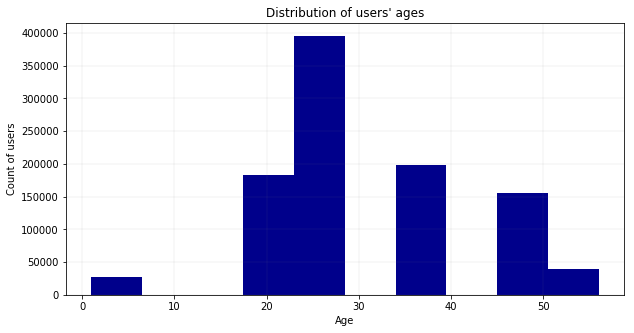

In [28]:
plt.figure(figsize=(10,5))

dataset.Age.plot.hist(color='darkblue')
plt.grid(True, linewidth=0.1, color='gray', linestyle='-')

plt.title("Distribution of users' ages")
plt.xlabel('Age')
plt.ylabel('Count of users');

From the plot above it is clear that the **majority of users are at the age between 20 to 30 years old.**

----

# User Rating Of The Movie ''Toy Story (1995)''

In [29]:
#Counting the ratings of each title
sumrate = dataset.groupby('Title')['Rating'].count()
sumrate.head()

Title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
Name: Rating, dtype: int64

In [30]:
#Taking the mean of ratings and sorting its values to descendant
meanrate = dataset.groupby('Title')['Rating'].mean().sort_values(ascending=False)
meanrate.head(17)

Title
Gate of Heavenly Peace, The (1995)                                    5.00
Lured (1947)                                                          5.00
Ulysses (Ulisse) (1954)                                               5.00
Smashing Time (1967)                                                  5.00
Follow the Bitch (1998)                                               5.00
Song of Freedom (1936)                                                5.00
Bittersweet Motel (2000)                                              5.00
Baby, The (1973)                                                      5.00
One Little Indian (1973)                                              5.00
Schlafes Bruder (Brother of Sleep) (1995)                             5.00
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                   4.80
Lamerica (1994)                                                       4.75
Apple, The (Sib) (1998)                                               4.67
Sanjuro (1962)     

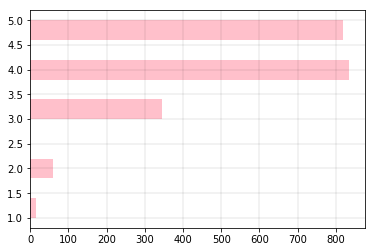

In [31]:
# Ploting the Ratings of the movie "Toy Story"
dataset[dataset['Title']== 'Toy Story (1995)'].Rating.hist(orientation='horizontal',color='pink' )
plt.grid(True, linewidth=0.1, color='black', linestyle='-')
                                                           


"Toy Story (1995)" **received Mostly 4 to 4.5 ratings** as presented on the above plot.

In [32]:
#Viewing the rating based on users' age
User_Age_Rating = dataset.groupby('Age')['Rating'].count()
User_Age_Rating

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: Rating, dtype: int64

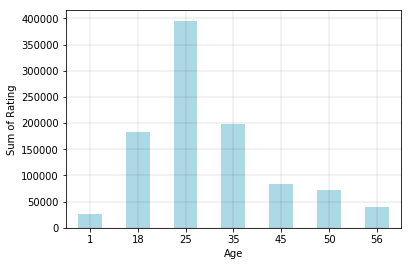

In [33]:
User_Age_Rating.plot(kind='bar', color ='lightblue');
plt.grid(True, linewidth=0.1, color='black', linestyle='-')
plt.xticks(rotation=0);
plt.ylabel('Sum of Rating');

The plot present the sum of rating based on the user age, which is illustrated that **most ratings are given by people between the age 25 to 35.**

----

# Top 25 Movies by Viewership Rating

In [34]:
dataset.groupby('Title').size().sort_values(ascending=False).head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

The Analysis on the top 25 movies by viewership rating shows that **"American Beauty (1999)" has the highest rating of 3428**

----

# Ratings of All The Movies Reviewed by User Id = 2696

In [35]:
user = dataset[dataset['UserID'] == 2696]
user.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


In [36]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 991035 to 991054
Data columns (total 10 columns):
MovieID       20 non-null int64
Title         20 non-null object
Genres        20 non-null object
UserID        20 non-null int64
Rating        20 non-null int64
Timestamp     20 non-null int64
Gender        20 non-null object
Age           20 non-null int64
Occupation    20 non-null int64
Zip-code      20 non-null object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


**20 ratings were placed by the UserID = 2696** as presented on the above analysis.

----

# Dealing with Categorical Values

**One-hot encoding method**
which is a process of converting categorical variables into a form that machine learning algorithms can understand to make better prediction.

In [37]:
#Selecting specific columns
selected_col = ['Genres','Rating','Age','Occupation']

In [38]:
df = dataset[selected_col]

In [39]:
#Generating dummy values for categorical data
genre_dummies = df['Genres'].str.get_dummies().add_prefix('Genre_')

In [40]:
#Connecting the dummy variables to the dataset
MasterData = pd.concat([df, genre_dummies], axis=1, join_axes=[df.index])
MasterData.head()

,Genres,Rating,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,Animation|Children's|Comedy,5,1,10,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Animation|Children's|Musical|Romance,5,1,10,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,Drama,5,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Action|Adventure|Fantasy|Sci-Fi,4,1,10,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Drama|War,5,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
#Viewing the dataset type
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 22 columns):
Genres               1000209 non-null object
Rating               1000209 non-null int64
Age                  1000209 non-null int64
Occupation           1000209 non-null int64
Genre_Action         1000209 non-null int64
Genre_Adventure      1000209 non-null int64
Genre_Animation      1000209 non-null int64
Genre_Children's     1000209 non-null int64
Genre_Comedy         1000209 non-null int64
Genre_Crime          1000209 non-null int64
Genre_Documentary    1000209 non-null int64
Genre_Drama          1000209 non-null int64
Genre_Fantasy        1000209 non-null int64
Genre_Film-Noir      1000209 non-null int64
Genre_Horror         1000209 non-null int64
Genre_Musical        1000209 non-null int64
Genre_Mystery        1000209 non-null int64
Genre_Romance        1000209 non-null int64
Genre_Sci-Fi         1000209 non-null int64
Genre_Thriller       1000209 non-null int64
Genre_

In [42]:
#The Relationship between features
MasterData.corr()

,Rating,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
Rating,1.00,0.06,0.01,-0.05,-0.04,0.02,-0.04,-0.04,0.03,0.03,...,-0.02,0.06,-0.09,0.02,0.02,0.01,-0.04,-0.00,0.08,0.01
Age,0.06,1.00,0.08,-0.03,-0.02,-0.05,-0.05,-0.04,-0.01,0.00,...,-0.02,0.03,-0.02,0.01,0.02,0.02,-0.01,-0.01,0.04,0.04
Occupation,0.01,0.08,1.00,0.02,0.01,-0.00,-0.01,-0.01,0.00,-0.00,...,0.00,0.01,0.00,-0.01,0.00,-0.01,0.03,0.01,0.01,0.01
Genre_Action,-0.05,-0.03,0.02,1.00,0.37,-0.11,-0.14,-0.27,0.09,-0.05,...,0.01,-0.08,-0.04,-0.10,-0.05,-0.07,0.32,0.20,0.14,0.02
Genre_Adventure,-0.04,-0.02,0.01,0.37,1.00,0.00,0.10,-0.12,-0.05,-0.04,...,0.23,-0.01,-0.06,-0.02,-0.04,-0.02,0.28,-0.04,0.02,-0.01
Genre_Animation,0.02,-0.05,-0.00,-0.11,0.00,1.00,0.58,0.02,-0.06,-0.02,...,0.01,0.04,-0.05,0.34,-0.04,-0.05,-0.06,-0.09,-0.05,-0.03
Genre_Children's,-0.04,-0.05,-0.01,-0.14,0.10,0.58,1.00,0.06,-0.08,-0.02,...,0.26,-0.04,-0.08,0.31,-0.05,-0.08,-0.04,-0.13,-0.07,-0.03
Genre_Comedy,-0.04,-0.04,-0.01,-0.27,-0.12,0.02,0.06,1.00,-0.08,-0.04,...,-0.01,-0.10,-0.09,0.03,-0.11,0.11,-0.19,-0.30,-0.13,0.01
Genre_Crime,0.03,-0.01,0.00,0.09,-0.05,-0.06,-0.08,-0.08,1.00,-0.03,...,-0.03,0.14,-0.05,-0.06,0.08,-0.07,-0.08,0.12,-0.08,-0.04
Genre_Documentary,0.03,0.00,-0.00,-0.05,-0.04,-0.02,-0.02,-0.04,-0.03,1.00,...,-0.02,-0.01,-0.03,-0.01,-0.02,-0.04,-0.04,-0.04,-0.02,-0.01


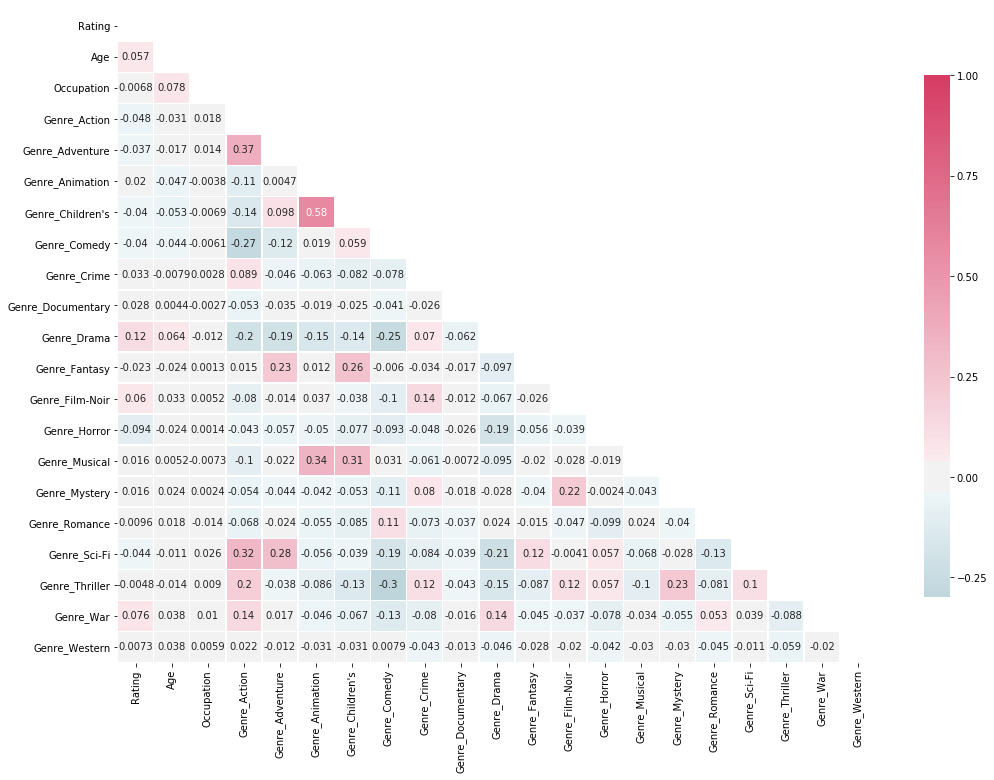

In [43]:
# Plotting the corrolation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(MasterData.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(17, 12))
cmap = sns.diverging_palette(220, 2, as_cmap=True)
sns.heatmap(MasterData.corr(), cmap=cmap,mask=mask, annot=True, linewidths=0.5, center=0,cbar_kws={"shrink": .8})
plt.show()

Correlation can indicate the relationship between two varialbes in a dataset. It ranges between -1 and 1, where -1 means negative strong correlation and +1 means positive strong correlation. Correlation consists of magintude which represents the strength of the relationshop and the sign which indicates the direction of the relationship. After applying the correlation function on the data we can see that **there is strong correlation between Children's and Animation Geners.**

----

# Seplit Training and Testing Data

Deviding the data into training and testing to train our model is a very crucial step in machine learning. 70% of the data will be used for training and 30% for testing. In this stage X_train and y_train will be used for training, later, the model will be feed with only X_test data to evaluate our model accuracy.


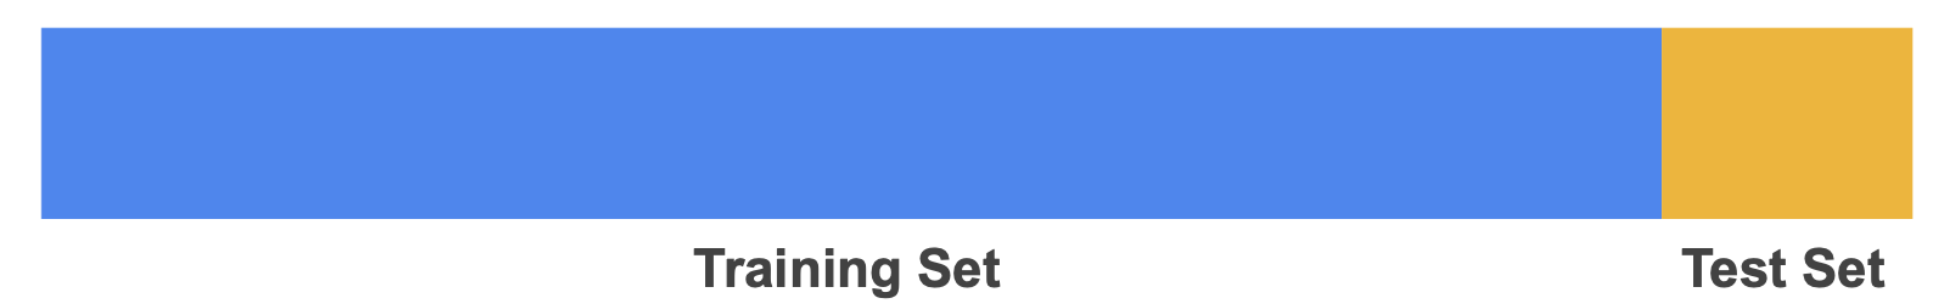

In [44]:
#seperate features from labels before building the model
X = MasterData[['Age','Occupation','Genre_Action','Genre_Adventure','Genre_Animation',
                     "Genre_Children's",'Genre_Comedy','Genre_Crime','Genre_Documentary','Genre_Drama',
                     'Genre_Fantasy','Genre_Film-Noir','Genre_Horror','Genre_Musical','Genre_Mystery',
                     'Genre_Romance','Genre_Sci-Fi','Genre_Thriller','Genre_War','Genre_Western']]
y = MasterData['Rating']
#ensure size of features and labels are consistant together
print('features shape is: {} while labels shape is: {}'.format(X.shape, y.shape))

features shape is: (1000209, 20) while labels shape is: (1000209,)


In [45]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [46]:
X_train.shape

(700146, 20)

In [47]:
X_test.shape

(300063, 20)

#### After Preparing the dataset, the split looks wise for the model to perform on different data.

---

# Applying Random Forest Regression Model

**Random Forest model** is well known effective machine learning model for predictive analysis and it is an algorithm of supervised classification. It is an ensemble learning method which groups many decision trees into one strong regressor and outputs depending on the tree’s majority votes the mean prediction for regression problems. The prediction process is made by combining a sequence of base model’s decisions. 

### Building the Model

In [48]:
#Building the model
model = RandomForestRegressor(random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test)

### Model Evaluation

In [49]:
#Calculating the Accuracy of the model
accuracies = cross_val_score(estimator = model, cv=5,  X = X_train, y = y_train)
print('')
print('Accuracy Score : %.4f' % model.score(X_test, y_test))
print('')
print(accuracies)



Accuracy Score : 0.0665

[0.05914749 0.06029436 0.05968728 0.06128798 0.05770332]


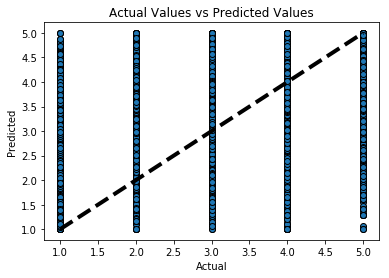

In [50]:
#The relationship between predicted and actual variables
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Values vs Predicted Values')
plt.show()

**As observed from the random forest regression model the prediction accuracy of movie ratings based on specific feature did not score that high.**

----

# Applying Feature Selection 

Applying Feature selection on the dataset may have better effect on the Random Forest Model. Therefore, I will use the **Univariate feature selection**, which works by selecting the best features based on univariate statistical tests.

In [51]:
from sklearn.feature_selection import SelectKBest #SelectKBest Selects the k highest scoring features
from sklearn.feature_selection import f_classif
MasterData = SelectKBest(f_classif, k=10).fit_transform(X, y)
MasterData.shape

(1000209, 10)

**The the number of features are reduced to 10 best indicators.**

In [52]:
#Import train_test_split
from sklearn.model_selection import train_test_split
#Split the data into training (70%) and testing (30%) sets 
X_train, X_test, y_train, y_test = train_test_split(MasterData, y, test_size = 0.3,random_state = 44)

In [53]:
from sklearn.ensemble import RandomForestClassifier #random forest
RF_clf = RandomForestClassifier(random_state=5) #building the model
RF_clf.fit(X_train, y_train) #fit the model on training data
model_predict = RF_clf.predict(X_test) #make a prediction on the test data

In [54]:
accuracies = cross_val_score(estimator = RF_clf, cv=5,  X = X_train, y = y_train)
print('')
print('Accuracy Score : %.4f' % RF_clf.score(X_test, y_test))
print('')
print(accuracies)


Accuracy Score : 0.3522

[0.35397162 0.3533957  0.35426947 0.35505042 0.35320793]


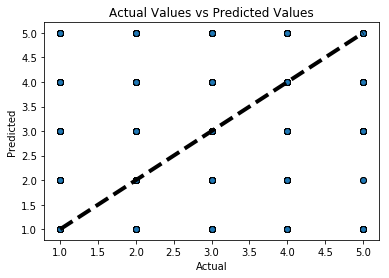

In [55]:
#The relationship between predicted and actual variables
fig,ax=plt.subplots()
ax.scatter(y_test,model_predict,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Values vs Predicted Values')
plt.show()

# Result
## Performing feature selection was better with an accuracy of 0.35, where the model without using feature selection had a 0.06 accuracy.

----

# Razan Alsulieman